      total_cup_points  species                     owner country_of_origin  \
0                90.58  Arabica                 metad plc          Ethiopia   
1                89.92  Arabica                 metad plc          Ethiopia   
2                89.75  Arabica  grounds for health admin         Guatemala   
3                89.00  Arabica       yidnekachew dabessa          Ethiopia   
4                88.83  Arabica                 metad plc          Ethiopia   
...                ...      ...                       ...               ...   
1333             78.75  Robusta               luis robles           Ecuador   
1334             78.08  Robusta               luis robles           Ecuador   
1335             77.17  Robusta               james moore     United States   
1336             75.08  Robusta             cafe politico             India   
1337             73.75  Robusta             cafe politico           Vietnam   

                                     farm_name lot_

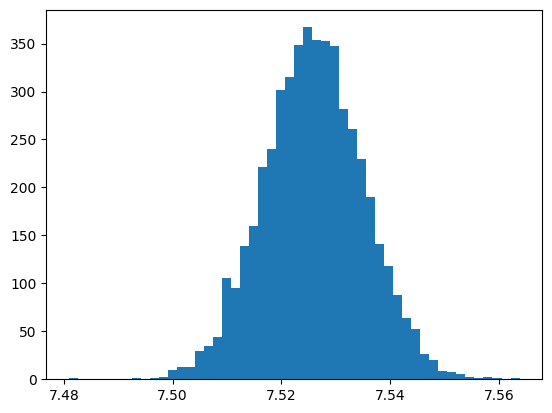

0.0022465050618963867

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#finding the zscore from a hypothesis on coffee flavor, we will calculate the standard error from a bootstrap distribution
#data source: https://app.datacamp.com/learn/courses/sampling-in-python
#hypothesis: the flavor rating for coffee in the population is 7.5
hypothesis_for_population_coffee_flavor = 7.5
#find the zscore of the mean of our sample vs the hypothesis

#read in the data
coffee = pd.read_feather('coffee_ratings.feather')

#subset the data so columns like lot number and growing region are excluded
coffee_subset = coffee[['total_cup_points','aroma','flavor','aftertaste','acidity','body','balance','uniformity','clean_cup','sweetness','cupper_points','moisture']]


#find the point estimate (the sample statistic)
coffee_subset['flavor'].mean()
#the mean of the coffee_subset flavor column (coffee_subset['flavor']) is 7.52
#7.52 is different from our hypothesis of 7.5, but is it meaningfully different?

#generate bootstrap distributions that resample the population so we can get a bootstrap distribution of the sample statistic
#create an empty list that will hold the means of each bootstrap distribution
coffee_bootstrap_distribution_means = []

#create the for loop to resample the entire dataset, get the mean of that resample, 
#then append that mean to our bootstrap distribution
for i in range(5000):
    #append the sample statistic in step 2 to our list (bootstrap distribution)
    coffee_bootstrap_distribution_means.append( \
        #get the mean of the column of interest (sample statistic) of the resampled data
        np.mean( \
            #resample the dataset creating a new dataset with the same number of values
            coffee_subset.sample(frac=1, replace=True) ['flavor'] \
        ) #end np.mean()
    ) #end .append()

#create a histogram of this distribution
plt.hist(coffee_bootstrap_distribution_means, bins=50)
plt.show()

#calculating the z-score
mean_sample=coffee_subset['flavor'].mean()
mean_hypothesis = hypothesis_for_population_coffee_flavor #given at beginning
#estimate of standard error in bootstrap distributions is the standard deviation of the bootstrap distribution
#set degrees of freedom to 1 bc it is a sample
standard_error = np.std(coffee_bootstrap_distribution_means, ddof=1)

z_score_coffee_flavor_hypothesis = ( mean_sample - mean_hypothesis ) / standard_error

z_score_coffee_flavor_hypothesis
# ~ 2.8 z score for 7.5 hypothesis

1-norm.cdf(z_score_coffee_flavor_hypothesis, loc=0, scale=1)
#pvalue is 0.002
